<a href="https://colab.research.google.com/github/WSmithDR/machine-learning-project/blob/main/Proyecto_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Machine Learning

## Grupo Zeta:

- 1. Cindy Cunalata
- 2. Viviana Huachizaca
- 3. Wagner Dueñas

# Entegabre 1

## Revisión preliminar de los datos:
Identifique el número de características, sus tipos de datos:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test = pd.read_csv('vehiculos_test.csv')
df_test.head()

,index,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion
0,0,Volkswagen,Passat,Blue,2015.0,Saloon,37723.0,2.0L,Automatic,Diesel,12690.0,5.0,4.0,Flat Tyres,0,2018-04-03,1,23.807,1.0,2018-04-03
1,1,Jaguar,XF,White,2014.0,Saloon,78000.0,2.2L,Automatic,Diesel,13490.0,5.0,4.0,Steering Wheel Shaking,0,2018-05-14,3,73.490,3.0,2018-05-14
2,2,Volkswagen,Polo,Orange,2010.0,Hatchback,44936.0,1.4L,Automatic,Petrol,NaN,5.0,5.0,Alternator Failing,0,2018-08-16,1,160.000,2.0,2018-08-16
3,3,Audi,S5,Black,2014.0,Coupe,29000.0,3.0L,Automatic,Petrol,22990.0,4.0,3.0,Steering Wheel Shaking,0,2018-07-24,1,42.990,1.0,2018-07-24
4,4,Toyota,Yaris,Black,2016.0,Hatchback,18037.0,1.33L,Manual,Petrol,9293.0,5.0,5.0,Electrical Issue,2,2018-05-04,1,28.586,0.5,2018-05-04


In [ ]:
df_train = pd.read_csv('vehiculos_train.csv')
df_train.head()

,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion,fraude
0,Jeep,Renegade,Black,2018.0,SUV,17.0,1.4L,Manual,Petrol,16000.0,5.0,5.0,Electrical Issue,5,2018-06-07,1,76.0000,3.0,2018-06-07,0
1,Vauxhall,Insignia,Grey,2011.0,Hatchback,93000.0,NaN,Manual,Petrol,3995.0,5.0,5.0,Excessive Emissions,0,2018-08-09,1,23.5955,1.0,2018-08-09,0
2,Mercedes-Benz,GLC Class,White,2019.0,SUV,6879.0,2.0L,Automatic,Diesel,31498.0,5.0,5.0,Windscreen Crack,0,2021-06-17,1,38.8988,1.0,2021-06-17,0
3,Renault,NaN,NaN,2014.0,Hatchback,20669.0,1.2L,Manual,Petrol,6950.0,5.0,5.0,Brake Pads Worn,0,2018-04-23,1,43.4750,2.0,2018-04-23,0
4,Ford,C-Max,NaN,2007.0,MPV,84786.0,1.6L,Manual,Petrol,NaN,5.0,5.0,Tyre Alignment,0,2018-05-20,1,10.2600,0.5,2018-05-20,0


In [ ]:
df_test.shape

(21826, 20)

In [ ]:
df_train.shape

(196429, 20)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196429 entries, 0 to 196428
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   marca                   196429 non-null  object 
 1   modelo                  177768 non-null  object 
 2   color                   191581 non-null  object 
 3   anio_registro           191599 non-null  float64
 4   tipo_vehiculo           196429 non-null  object 
 5   millas_recorridas       193664 non-null  float64
 6   tamanio_motor           195482 non-null  object 
 7   transmision             196429 non-null  object 
 8   tipo_combustible        196429 non-null  object 
 9   precio_vehiculo         186867 non-null  float64
 10  num_asientos            196429 non-null  float64
 11  num_puertas             196429 non-null  float64
 12  problema_averia         196429 non-null  object 
 13  id_problema_averia      196429 non-null  int64  
 14  fecha_averia        

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21826 entries, 0 to 21825
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   21826 non-null  int64  
 1   marca                   21826 non-null  object 
 2   modelo                  19719 non-null  object 
 3   color                   21281 non-null  object 
 4   anio_registro           21298 non-null  float64
 5   tipo_vehiculo           21826 non-null  object 
 6   millas_recorridas       21510 non-null  float64
 7   tamanio_motor           21717 non-null  object 
 8   transmision             21826 non-null  object 
 9   tipo_combustible        21826 non-null  object 
 10  precio_vehiculo         20805 non-null  float64
 11  num_asientos            21826 non-null  float64
 12  num_puertas             21826 non-null  float64
 13  problema_averia         21826 non-null  object 
 14  id_problema_averia      21826 non-null

## Análisis Univariado:
- Seleccione al menos tres variables y realice un análisis univariable en cada una.
- Proporcione visualizaciones (por ejemplo, histogramas, diagramas de caja) para cada variable seleccionada e interprételas.

### Datos Faltantes

Análisis de datos faltantes NaN (Not a Number) por filas

In [ ]:
#Porcentajes de NaN por columnas

# Calculate percentage of missing values in each column
missing_percentages = (df_train.isnull().sum() / len(df_train) * 100).round(2)

# Sort values in descending order to see columns with most missing values
missing_percentages_sorted = missing_percentages.sort_values(ascending=False)

# Create a more descriptive output
print(f"Missing Values Analysis (Total rows: {len(df_train)})")

# Show all columns including those with 0% missing values
# Add percentage symbol to each value when displaying
print(missing_percentages_sorted.apply(lambda x: f"{x}%"))

Missing Values Analysis (Total rows: 196429)
modelo                     9.5%
precio_vehiculo           4.87%
color                     2.47%
anio_registro             2.46%
millas_recorridas         1.41%
tamanio_motor             0.48%
marca                      0.0%
tipo_vehiculo              0.0%
transmision                0.0%
tipo_combustible           0.0%
num_asientos               0.0%
num_puertas                0.0%
problema_averia            0.0%
id_problema_averia         0.0%
fecha_averia               0.0%
complejidad_reparacion     0.0%
costo_reparacion           0.0%
horas_reparacion           0.0%
fecha_reparacion           0.0%
fraude                     0.0%
dtype: object


Análisis de datos faltantes NaN (Not a Number) por columnas

In [ ]:
#analizar si tengo más del 70% de los valores de una fila con NaN

# Fijamos el límite de 70%
threshold = 0.7

# Calculamos el número de columnas en el df
num_cols = len(df_train.columns)

# Calculamos el limite de NaN en funcion del threshold y el num de columnas
null_threshold = int(threshold * num_cols)

# Contamos el numero de filas con NaN que exceden el limite estimado
num_rows_mostly_null = df_train[(df_train.isnull().sum(axis=1) >= null_threshold)].shape[0]

# El resultado es
print("Number of rows with mostly null values:", num_rows_mostly_null)

Number of rows with mostly null values: 0


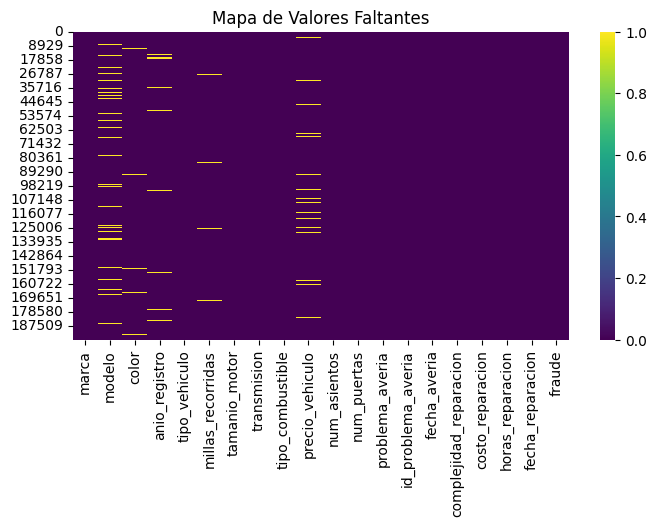

In [ ]:
# visual
plt.figure(figsize=(8, 4))
sns.heatmap(df_train.isnull(), cbar=True, cmap="viridis")
plt.title("Mapa de Valores Faltantes")
plt.show()

## Datos atípicos

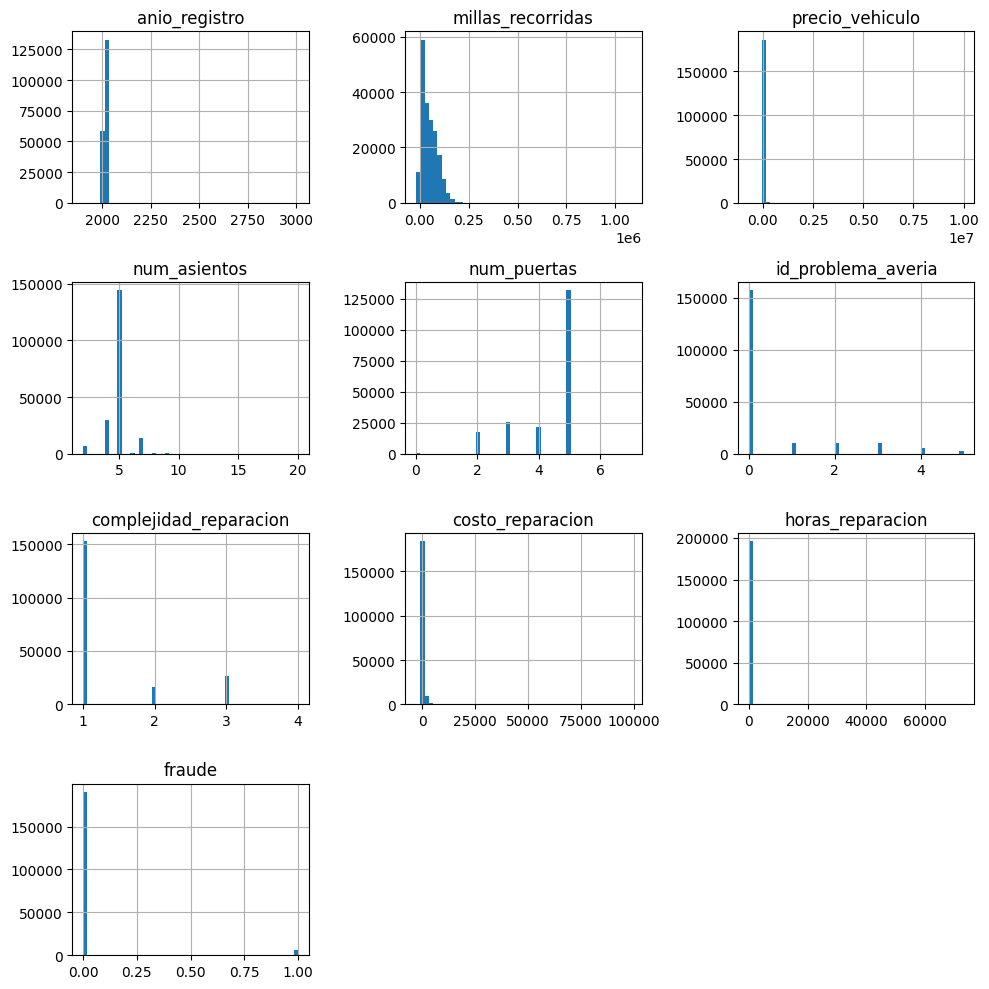

In [ ]:
#distribución del dataset train
df_train.hist(bins=50, figsize=(10,10))
plt.tight_layout()
plt.show()

In [ ]:
df_train.columns

Index(['marca', 'modelo', 'color', 'anio_registro', 'tipo_vehiculo',
       'millas_recorridas', 'tamanio_motor', 'transmision', 'tipo_combustible',
       'precio_vehiculo', 'num_asientos', 'num_puertas', 'problema_averia',
       'id_problema_averia', 'fecha_averia', 'complejidad_reparacion',
       'costo_reparacion', 'horas_reparacion', 'fecha_reparacion', 'fraude'],
      dtype='object')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196429 entries, 0 to 196428
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   marca                   196429 non-null  object 
 1   modelo                  177768 non-null  object 
 2   color                   191581 non-null  object 
 3   anio_registro           191599 non-null  float64
 4   tipo_vehiculo           196429 non-null  object 
 5   millas_recorridas       193664 non-null  float64
 6   tamanio_motor           195482 non-null  object 
 7   transmision             196429 non-null  object 
 8   tipo_combustible        196429 non-null  object 
 9   precio_vehiculo         186867 non-null  float64
 10  num_asientos            196429 non-null  float64
 11  num_puertas             196429 non-null  float64
 12  problema_averia         196429 non-null  object 
 13  id_problema_averia      196429 non-null  int64  
 14  fecha_averia        

In [ ]:
df_train.describe()

,anio_registro,millas_recorridas,precio_vehiculo,num_asientos,num_puertas,id_problema_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fraude
count,191599.000000,1.936640e+05,1.868670e+05,196429.000000,196429.000000,196429.000000,196429.000000,196429.000000,196429.000000,196429.000000
mean,2012.678208,4.867635e+04,1.396373e+04,4.935590,4.358593,0.498511,1.366855,342.198345,12.427234,0.030937
std,5.006846,4.004901e+04,3.307734e+04,1.072501,1.031904,1.131135,0.726668,1057.977648,306.762296,0.173149
min,1900.000000,-1.991700e+04,-6.967960e+05,2.000000,0.000000,0.000000,1.000000,-2989.000000,-28.000000,0.000000
25%,2009.000000,1.464700e+04,4.795000e+03,5.000000,4.000000,0.000000,1.000000,35.570000,1.000000,0.000000
50%,2014.000000,4.000000e+04,8.999000e+03,5.000000,5.000000,0.000000,1.000000,105.430000,2.000000,0.000000
75%,2016.000000,7.557125e+04,1.697000e+04,5.000000,5.000000,0.000000,1.000000,288.750000,4.000000,0.000000
max,3010.000000,1.080000e+06,9.999999e+06,20.000000,7.000000,5.000000,4.000000,98690.116330,73134.610091,1.000000


In [ ]:
df_train_n = df_train.copy()

### Anio_registro

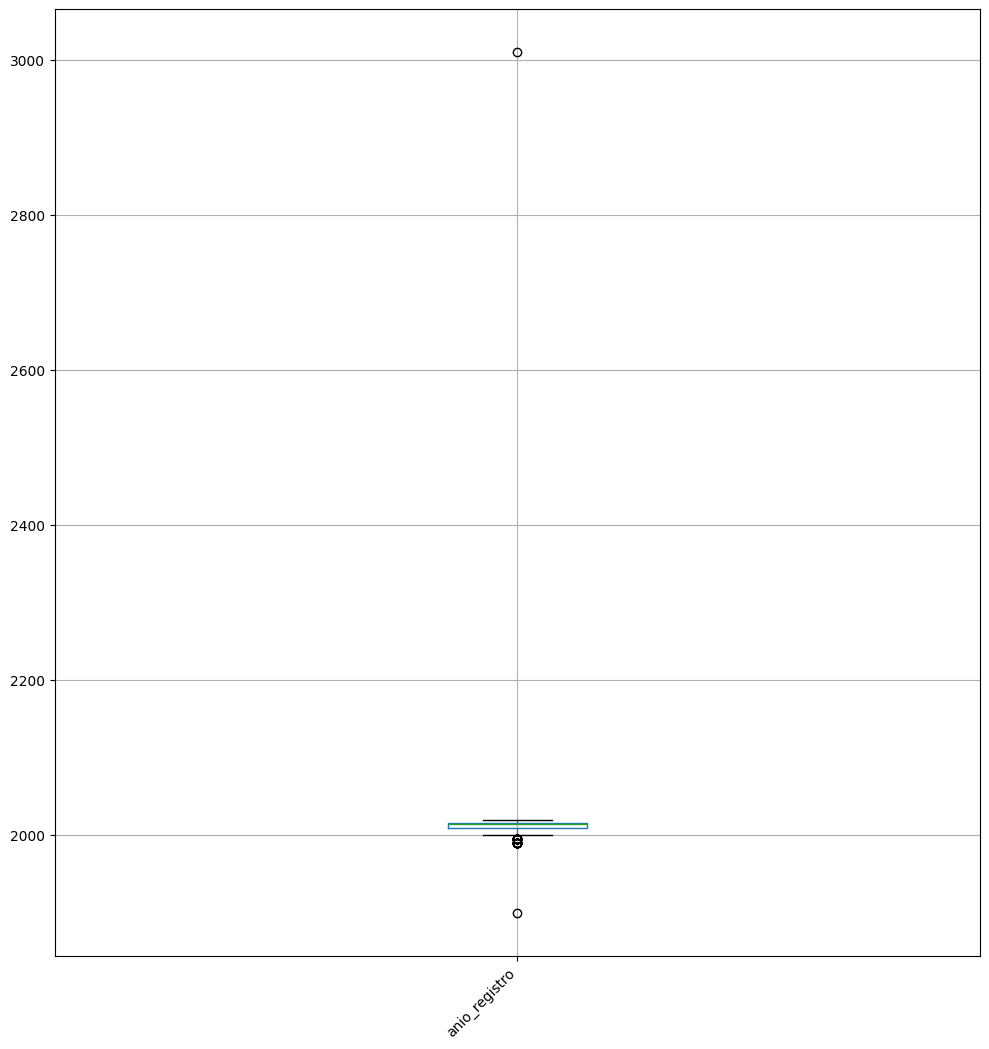

In [ ]:
#visualización de valores atípicos del dataset train
df_train[['anio_registro']].boxplot(figsize=(10, 10))
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#visualización de valores atípicos del dataset train
df_train[['anio_registro']].groupby('anio_registro').size()

,0
anio_registro,
1900.0,1
1990.0,12
1995.0,19
2000.0,496
2001.0,1163
2002.0,1962
2003.0,2449
2004.0,3797
2005.0,4346


In [ ]:
#analizamos las caracteristica que tiene el carro con el anio aberrante
df_train[df_train['anio_registro']==1900.0].head()

,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion,fraude
23716,Vauxhall,Corsa,Grey,1900.0,Hatchback,NaN,1.4L,Manual,Petrol,8500.0,12.0,0.0,Gear Box Issue,0,2018-05-04,1,626.373971,475.223492,2018-06-01,1


In [ ]:
#filtramos el df con las mismas caracteristicas que tiene el carro con el anio aberrante
df_train[(df_train['marca']=='Vauxhall') & (df_train['modelo']=='Corsa') & (df_train['tamanio_motor']=='1.4L') & (df_train['precio_vehiculo']==8500.0)& (df_train['color']=='Grey')].head(23)

,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion,fraude
23716,Vauxhall,Corsa,Grey,1900.0,Hatchback,NaN,1.4L,Manual,Petrol,8500.0,12.0,0.0,Gear Box Issue,0,2018-05-04,1,626.373971,475.223492,2018-06-01,1
75841,Vauxhall,Corsa,Grey,2016.0,Hatchback,10945.0,1.4L,Manual,Petrol,8500.0,5.0,5.0,Transmission Issue,1,2018-04-20,1,105.500000,4.000000,2018-04-21,0


In [ ]:
#reemplazamos el anio de otro carro similar que tiene caracteristicas similares
df_train_n.loc[df_train_n['anio_registro'] == 1900.0, 'anio_registro'] = 2016.0


In [ ]:
#analizamos las caracteristica que tiene el carro con el anio aberrante
df_train[df_train['anio_registro']==3010.0].head()

,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion,fraude
166214,BMW,7 Series,Grey,3010.0,Wood,-2038.0,999.0L,Hybrid,Hydrogen,-182067.0,12.0,0.0,Excessive Emissions,0,2018-04-15,1,-418.0,1.0,2018-04-15,1


In [ ]:
#filtramos el df con las mismas caracteristicas que tiene el carro con el anio aberrante
# df_train[(df_train['marca']=='BMW') & (df_train['modelo']=='7 Series') & (df_train['tamanio_motor']=='999.0L')& (df_train['color']=='Grey')].head(23)
df_train[(df_train['marca']=='BMW') & (df_train['modelo']=='7 Series') & (df_train['color']=='Grey')].groupby('anio_registro').size().sort_values()

,0
anio_registro,
3010.0,1
2003.0,2
2006.0,2
2005.0,2
2008.0,3
2010.0,3
2015.0,3
2007.0,3
2012.0,3


In [ ]:
#reemplazamos el anio de otro carro similar que tiene caracteristicas similares
df_train_n.loc[df_train_n['anio_registro'] == 3010.0, 'anio_registro'] = 2019.0

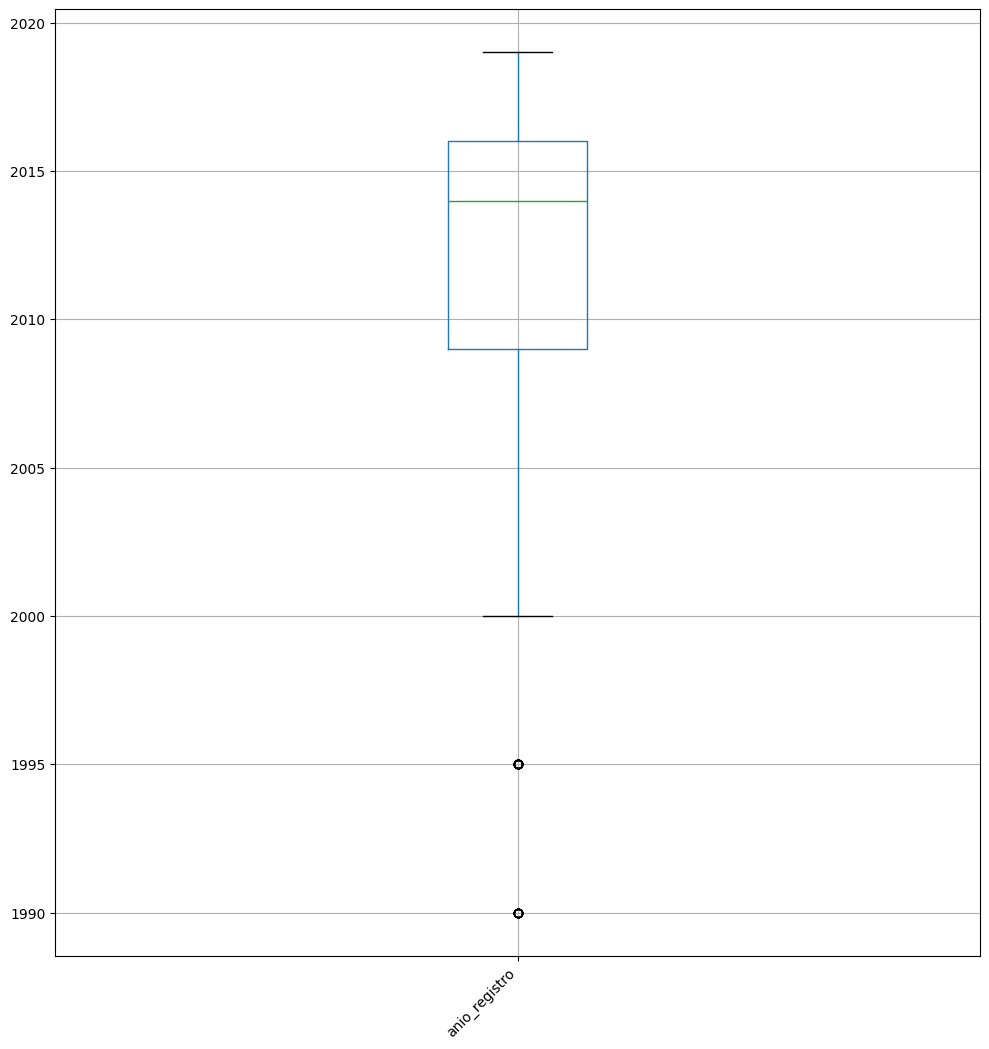

In [ ]:
#visualización de valores atípicos del dataset limpio
df_train_n[['anio_registro']].boxplot(figsize=(10, 10))
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

## millas_recorridas

## precio_vehiculo


## costo_reparacion

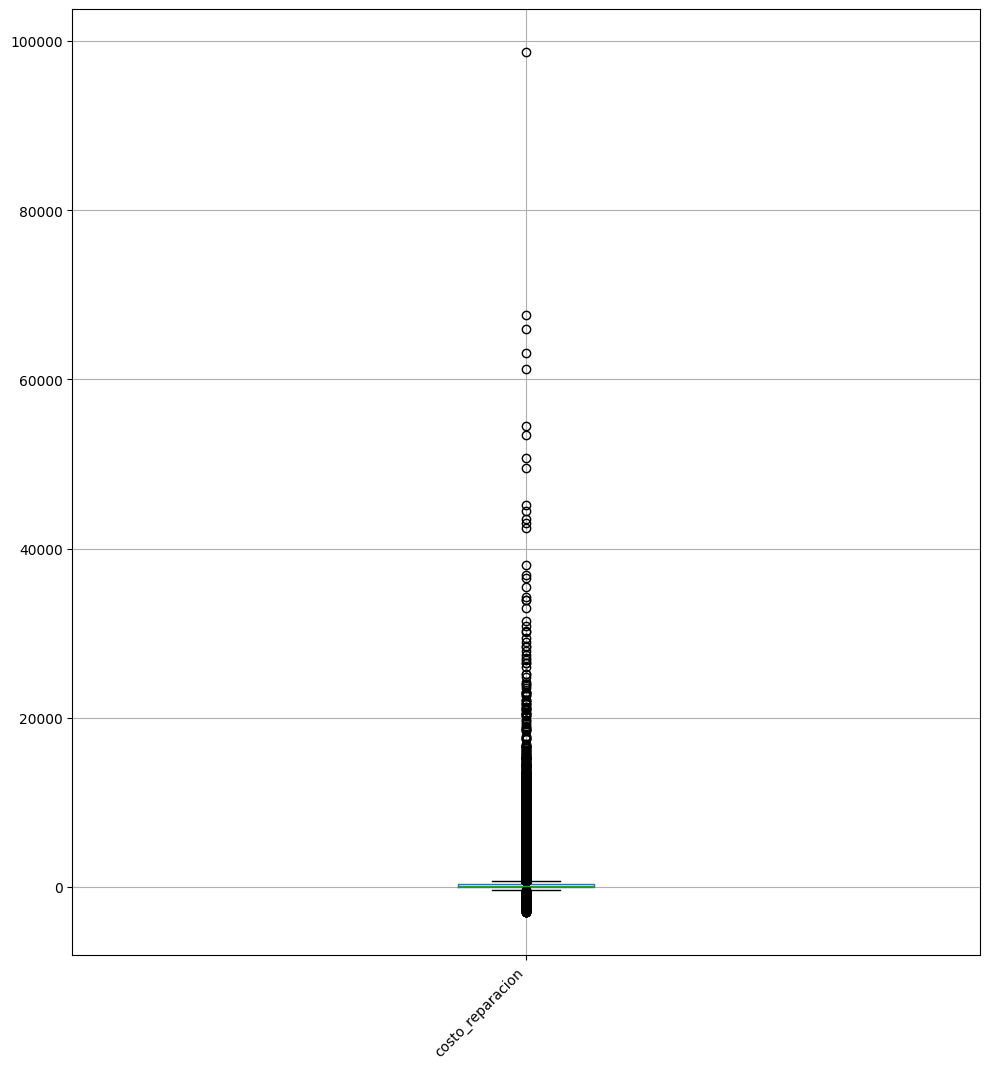

In [ ]:
#visualización de valores atípicos del dataset train
df_co = df_train[['costo_reparacion']]
# df_co[df_train['costo_reparacion'] < 0].boxplot(figsize=(10, 10))
df_train[['costo_reparacion']].boxplot(figsize=(10, 10))
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#datos que tienen ruido, no deberían estar con valor negativo
df_train[df_train['costo_reparacion'] < 0].groupby(['marca','modelo','anio_registro']).size()

marca  modelo                 anio_registro
BMW    6 Series               2005.0            9
                              2009.0            1
                              2010.0            1
                              2011.0            3
                              2012.0            6
                              2013.0            5
                              2014.0            4
       6 Series Gran Coupe    2012.0            1
                              2013.0            5
                              2014.0            9
                              2015.0            6
                              2016.0            1
                              2017.0            7
                              2018.0            2
       6 Series Gran Turismo  2017.0            6
       7 Series               2002.0            1
                              2003.0            1
                              2009.0            2
                              2010.0            4
                              2011.0            5
                              2012.0            3
                              2013.0            3
                              2014.0            4
                              2015.0            2
                              2016.0            4
                              2017.0            7
                              2018.0            2
                              3010.0            1
       Alpina D3              2007.0            1
       Alpina D3 Bi-Turbo     2008.0            2
                              2011.0            1
       Alpina D4              2018.0            1
       Alpina D5 Bi-Turbo     2012.0            1
       M2                     2016.0            1
                              2017.0            9
                              2018.0           11
dtype: int64

In [ ]:
#analizamos las caracteristica que tiene el carro con el anio aberrante
df_train[df_train['costo_reparacion'] < 0].head(137)

,marca,modelo,color,anio_registro,tipo_vehiculo,millas_recorridas,tamanio_motor,transmision,tipo_combustible,precio_vehiculo,num_asientos,num_puertas,problema_averia,id_problema_averia,fecha_averia,complejidad_reparacion,costo_reparacion,horas_reparacion,fecha_reparacion,fraude
2903,BMW,6 Series Gran Turismo,White,2017.0,Hatchback,5650.0,3.0L,Automatic,Diesel,-33329.0,5.0,5.0,Electrical Issue,5,2018-03-20,1,-700.0,3.0,2018-03-20,1
4266,BMW,6 Series Gran Coupe,Black,2018.0,Coupe,15.0,3.0L,Automatic,Diesel,NaN,5.0,4.0,Electrical Issue,1,2018-03-25,1,-2719.0,2.0,2018-03-25,1
5714,BMW,Alpina D3,Blue,2007.0,Saloon,154286.0,2.0L,Manual,Diesel,-480465.0,5.0,0.0,Alternator Failing,0,2018-01-07,1,-1242.0,2.0,2018-01-07,1
5720,BMW,6 Series Gran Turismo,Grey,2017.0,Hatchback,5651.0,3.0L,Automatic,Diesel,-34768.0,5.0,5.0,Starter Motor Issue,0,2018-02-20,1,-1696.0,3.0,2018-02-20,1
8535,BMW,6 Series Gran Coupe,Red,2015.0,Coupe,11018.0,3.0L,Automatic,Petrol,-233553.0,4.0,4.0,Windscreen Crack,0,2018-02-21,1,-1096.0,1.0,2018-02-21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182174,BMW,6 Series Gran Coupe,White,2014.0,Coupe,45222.0,3.0L,Automatic,Diesel,-20904.0,5.0,4.0,Electrical Issue,5,2018-03-07,1,-2182.0,3.0,2018-03-07,1
183782,BMW,7 Series,Black,2012.0,Saloon,54000.0,3.0L,Automatic,Diesel,-68783.0,5.0,4.0,Gear Box Issue,0,2018-03-15,1,-1971.0,2.0,2018-03-15,1
184604,BMW,6 Series Gran Coupe,White,2015.0,Coupe,32200.0,3.0L,Automatic,Diesel,-380331.0,4.0,4.0,Windscreen Crack,0,2017-06-25,1,-1719.0,1.0,2017-06-25,1
184793,BMW,6 Series Gran Coupe,Black,2017.0,Coupe,9692.0,3.0L,Automatic,Diesel,-17360.0,5.0,4.0,Radiator Leaking,0,2018-03-09,1,-677.0,2.0,2018-03-09,1


## horas_reparacion

## Análisis Multivariado:
- Elija al menos dos pares de variables (no considere la variable target) y realice un análisis multivariable para cada par.
- Elija al menos dos variables de variables y realice un análisis multivariable entre las variables elegidas y la variable target.
- Utilice visualizaciones adecuadas (por ejemplo, diagramas de dispersión, gráficos de barras).
- Explique cualquier relación observada entre los pares de variables analizados.


# Implemente al menos 3 modelos de clasificación e intente superar al baseline compartido.
Para los 3 modelos utilice el mismo algoritmo de clasificación (elija uno aprendido en clases) con diferentes configuraciones. Distintas configuraciones pueden incluir distintos valores de hiperparámetros o técnicas de procesamiento de los datos de entrada. Para las distintas configuraciones puede considerar lo siguiente:
- Sus datos podrían ser estandarizados/normalizados o no.
- Puede definir alguna estrategia para codificar variables categóricas (puede utilizar One-hot-encoding, Target encoding, u otra estrategia).
- Identifique valores faltantes y defina una estrategia (de ser necesario) para la imputación de datos.
- Analice las variables categóricas y determine si es necesario tratar categorías poco frecuentes (por ejemplo, a veces agrupar categorías raras puede ser útil). Explique sus decisiones en el tratamiento de los datos.
- Detecte valores atípicos y defina una estrategia para tratarlos. Considere que eliminar los registros outliers (del set de entrenamiento) no es la única estrategia posible (puede considerar la regla del rango intercuartil, Local Outlier Factor, u otra estrategia). Explique sus decisiones en el tratamiento de los datos.



# Evalúe y compare todos los modelos.
Interprete los resultados y concluya cuál modelo es el mejor. Puede considerar más de una métrica de evaluación para su conclusión.
